In [ ]:
!pip install PILLOW
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import PIL
from sklearn.preprocessing import MultiLabelBinarizer

# Load genre information from CSV
genres_df = pd.read_csv('/content/drive/MyDrive/Movies-Poster_Dataset-master/genres.csv')
num_classes = 25#genres_df.shape[1] - 1  # Subtract 1 for the movie ID column

# Load movie poster images
poster_dir = '/content/drive/MyDrive/Movies-Poster_Dataset-master/Images2'
posters = []
for filename in os.listdir(poster_dir):
    try:
        img = Image.open(os.path.join(poster_dir, filename))
        img = img.convert('RGB')  # Convert to RGB mode
        img = img.resize((100, 150), Image.ANTIALIAS)  # Resize to a consistent shape
        img = np.array(img)
        posters.append(img)
    except (OSError, PIL.UnidentifiedImageError,  ValueError):
        print(f"Error loading image: {filename}")
        continue


posters = np.array(posters)

# Convert genre labels to one-hot encoding using MultiLabelBinarizer
genre_labels = genres_df['Genre'].apply(eval)  # Convert the string representation to a list
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(genre_labels)

# Split genre data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(posters, genre_encoded, test_size=0.15, random_state=42)  # Add random_state

# Preprocess input images
X_train = X_train / 255.0  # Normalize pixel values between 0 and 1
X_test = X_test / 255.0

# Build CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 100, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#
#datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True, rescale=1./255)
#datagen.fit(X_train)


# Train the model
history = model.fit(X_train, y_train, batch_size=16, epochs=10, validation_split=0.15)
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: {:.2f}%'.format(accuracy * 100))
# Visualize training and validation accuracy
#plt.plot(model.history.history['Accuracy'])
#plt.plot(model.history.history['val_accuracy'])
#plt.title('Model Accuracy')
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
#plt.legend(['Train', 'Validation'], loc='upper left')
#plt.show()

# Visualize training and validation loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Test the model
predictions = model.predict(X_test)
predicted_genres = [np.argmax(prediction) for prediction in predictions]
actual_genres = [np.argmax(label) for label in y_test]
cannot_remember =0
cannot_remember += len([1 for pred, actual in zip(predicted_genres, actual_genres) if pred != actual])
accuracy = (1 - (cannot_remember / len(actual_genres))) * 100
print('Accuracy: {:.2f}%'.format(accuracy))

<ipython-input-1-7471da85d225>:26: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((100, 150), Image.ANTIALIAS)  # Resize to a consistent shape


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Movies-Poster_Dataset-master/genres.csv')
data.shape

In [ ]:
!pip install keras_preprocessing
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras import regularizers, optimizers
from keras.layers import Input
from keras.preprocessing import image
from sklearn.metrics import hamming_loss, confusion_matrix
import matplotlib.pyplot as plt
import keras
from keras.models import Model, load_model
from keras.applications import MobileNet,ResNet50
from PIL import ImageFile
from sklearn.metrics import precision_recall_curve,roc_curve
from sklearn.metrics import average_precision_score
from keras import backend as K

ImageFile.LOAD_TRUNCATED_IMAGES = True

import tensorflow as tf
import pandas as pd
import numpy as np


**NEW MODEL**

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score



In [ ]:
# READING DATASET

df = pd.read_csv('../content/drive/MyDrive/Movies-Poster_Dataset-master/train.csv')

In [ ]:
# CONVERTING THE IMAGES INTO NUMPY TO TRAIN THE MODEL

width = 350
height = 350
X = []
for i in tqdm(range(df.shape[0])):
  path = '../content/drive/MyDrive/Movies-Poster_Dataset-master/Images/'+df['Id'][i]+'.jpg'
  img = image.load_img(path,target_size=(width,height,3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

100%|██████████| 7254/7254 [51:37<00:00,  2.34it/s]


In [ ]:
X.shape


(7254, 350, 350, 3)

In [ ]:
y = df.drop(['Id','Genre'],axis=1)
y = y.to_numpy()
y.shape

(7254, 25)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)

In [ ]:
# BUILDING THE MODEL

model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(25, activation='sigmoid'))
model.summary()
Model: "sequential"


model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 348, 348, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 348, 348, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 174, 174, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 174, 174, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 172, 172, 32)      4640      
                                                                 
 batch_normalization_1 (Bat  (None, 172, 172, 32)      1

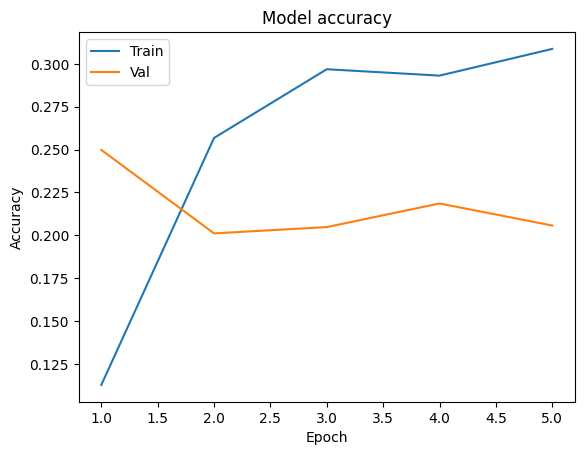

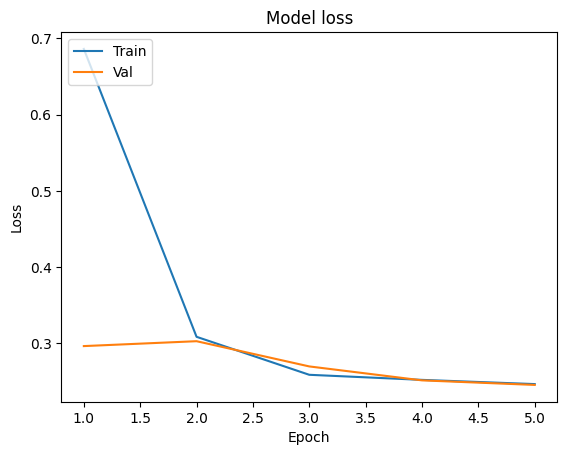

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(history, 5)


# Save the model to a file
model.save('movie_poster_model.h5')


In [ ]:
# PREDICTING GENRE AND COMPUTING METRICS
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred > 0.5, average='micro')
    recall = recall_score(y_test, y_pred > 0.5, average='micro')
    f1 = f1_score(y_test, y_pred > 0.5, average='micro')
    accuracy = accuracy_score(y_test, y_pred > 0.5)

    # Calculate ROC AUC for each class separately
    roc_auc = roc_auc_score(y_test, y_pred, average='micro')

    return precision, recall, f1, accuracy, roc_auc


precision, recall, f1, accuracy, roc_auc = evaluate_model(model, X_test, y_test)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")

35/35 [==============================] - 1s 20ms/step
Precision: 0.4986990459670425
Recall: 0.22566718995290425
F1-Score: 0.31072683058632805
Accuracy: 0.06611570247933884
ROC AUC: 0.8329360232158673


35/35 [==============================] - 1s 20ms/step


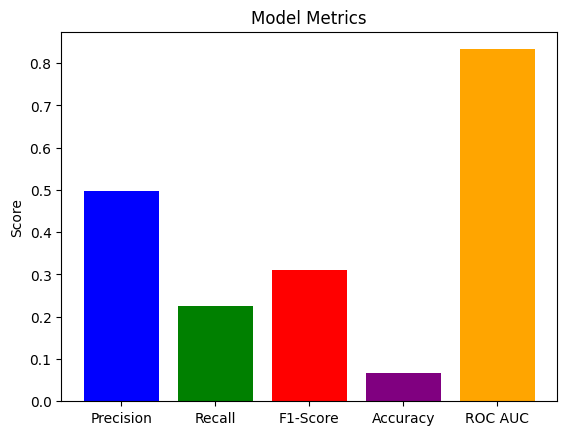

In [ ]:
precision, recall, f1, accuracy, roc_auc = evaluate_model(model, X_test, y_test)

# Bar chart for metrics
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'ROC AUC']
values = [precision, recall, f1, accuracy, roc_auc]

plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Model Metrics')
plt.ylabel('Score')
plt.show()

1/1 [==============================] - 0s 327ms/step
Drama
Comedy
Romance


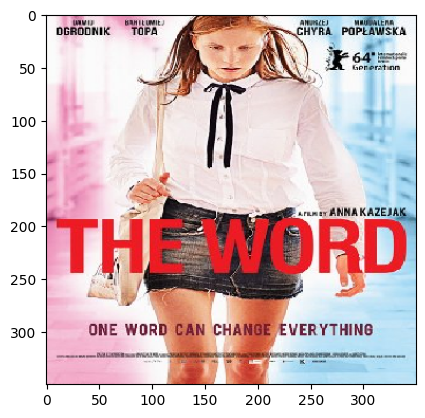

In [ ]:
img = image.load_img('../content/drive/MyDrive/Movies-Poster_Dataset-master/Images/tt0085255.jpg',target_size=(width,height,3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1,width,height,3)
classes = df.columns[2:]
y_pred = model.predict(img)
top3=np.argsort(y_pred[0])[:-4:-1]
for i in range(3):
  print(classes[top3[i]])


**SVM** **MODELING**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model



In [ ]:
# Load the dataset
df = pd.read_csv('../content/drive/MyDrive/Movies-Poster_Dataset-master/train.csv')

In [ ]:
# Taking 40 percentage of the dataset for this project as using whole dataset crashes the memory threshold of kaggle kernels
df = df.head(4000)

In [ ]:
X = []
y = df.drop(['Id', 'Genre'], axis=1)
y.shape

(4000, 25)

In [ ]:
# Load a pre-trained VGG16 model for feature extraction
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Extract features from the VGG16 model
X = []
width, height = 224, 224  # Input size for VGG16
for i in range(df.shape[0]):
    path = '../content/drive/MyDrive/Movies-Poster_Dataset-master/Images/' + df['Id'][i] + '.jpg'
    img = image.load_img(path, target_size=(width, height))
    img = image.img_to_array(img)
    img = preprocess_input(img)
    features = model.predict(np.expand_dims(img, axis=0))
    X.append(features.flatten())  # Flatten the features

X_features = np.array(X)

1/1 [==============================] - 0s 161ms/step


In [ ]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.15, random_state=42)


In [ ]:
mlb = MultiLabelBinarizer()
y_train_binary = mlb.fit_transform(y_train)
y_test_binary = mlb.transform(y_test)  # Ensure consistent label encoding for test data


In [ ]:
# Check the number of samples in X_train and X_test
print(len(X_train), len(X_test))


3400 600


In [ ]:
print(y_train.shape)
print(y_test.shape)


(3400, 25)
(600, 25)


In [ ]:
print("y_train:")
print(y_train[:5])  # Print the first 5 rows
print("y_test:")
print(y_test[:5])   # Print the first 5 rows


y_train:
      Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  \
257        0          1          0          0       1      0            0   
295        0          0          0          0       0      0            0   
2092       0          0          0          0       1      0            0   
1034       0          0          0          0       1      1            0   
1545       1          0          0          0       0      1            0   

      Drama  Family  Fantasy  ...  N/A  News  Reality-TV  Romance  Sci-Fi  \
257       0       0        0  ...    0     0           0        0       0   
295       1       0        0  ...    0     0           0        1       0   
2092      1       0        0  ...    0     0           0        0       0   
1034      0       0        0  ...    0     0           0        0       0   
1545      0       0        0  ...    0     0           0        0       0   

      Short  Sport  Thriller  War  Western  
257       0      0  

In [ ]:
for label_index in range(y_train_binary.shape[1]):
    print(f"Label Index: {label_index}")
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train_binary shape: {y_train_binary.shape}")

    svm_classifier = SVC(kernel='linear', probability=True)
    svm_classifier.fit(X_train, y_train_binary[:, label_index])
    svm_classifiers.append(svm_classifier)


In [ ]:
# Train binary SVM classifiers
svm_classifiers = []
for label_index in range(y_train_binary.shape[1]):
    svm_classifier = SVC(kernel='linear', probability=True)  # Using probability=True for ROC AUC calculation
    svm_classifier.fit(X_train, y_train_binary[:, label_index])
    svm_classifiers.append(svm_classifier)

    # Make predictions using SVM classifiers
def predict_labels(image_features):
    binary_predictions = [classifier.predict([image_features])[0] for classifier in svm_classifiers]
    return binary_predictions

    # Ensure binary_predictions has the shape (number of labels,)
    binary_predictions = np.array(binary_predictions)

    # Reshape binary_predictions to (1, number of labels) for consistency with multi-label format
    binary_predictions = binary_predictions.reshape(1, -1)

    # Inverse transform binary_predictions to get multi-label format
    multi_labels = mlb.inverse_transform(binary_predictions)

    return multi_labels

In [ ]:
# Make predictions using SVM classifiers
def predict_labels(image_features):
    binary_predictions = [classifier.predict([image_features])[0] for classifier in svm_classifiers]

    # Ensure binary_predictions has the shape (number of labels,)
    binary_predictions = np.array(binary_predictions)

    # Reshape binary_predictions to (1, number of labels) for consistency with multi-label format
    binary_predictions = binary_predictions.reshape(1, -1)

    # Inverse transform binary_predictions to get multi-label format
    multi_labels = mlb.inverse_transform(binary_predictions)

    return multi_labels

In [ ]:
# Evaluate the model and compute metrics
def evaluate_model(X_test, y_test, svm_classifiers, mlb):
    y_pred_binary = np.array([classifier.predict(X_test) for classifier in svm_classifiers]).T
    y_pred_multilabel = mlb.inverse_transform(y_pred_binary)

    precision = precision_score(y_test, y_pred_binary, average='micro')
    recall = recall_score(y_test, y_pred_binary, average='micro')
    f1 = f1_score(y_test, y_pred_binary, average='micro')
    accuracy = accuracy_score(y_test, y_pred_binary)
    roc_auc = roc_auc_score(y_test, y_pred_binary, average='micro')

    return precision, recall, f1, accuracy, roc_auc

precision, recall, f1, accuracy, roc_auc = evaluate_model(X_test, y_test, svm_classifiers, mlb)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")

**RANDOM** **FOREST**

In [ ]:
import numpy as np
from skimage.feature import hog
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest classifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
from tqdm import tqdm
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
# Load the dataset
df = pd.read_csv('../content/drive/MyDrive/Movies-Poster_Dataset-master/train.csv')


In [ ]:
# Taking 40 percentage of the dataset for this project as using whole dataset crashes the memory threshold of kaggle kernels
df = df.head(4000)

In [ ]:
X = []
y = df.drop(['Id', 'Genre'], axis=1)
y.shape

(7254, 25)

In [ ]:
# Split the 'Genre' column into a list of labels
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['Genre'].apply(lambda x: x.split('|')))


In [ ]:
# Split the dataset into training and testing sets
y_train, y_test = train_test_split(y, test_size=0.15, random_state=42)


In [ ]:
# Load and preprocess the images
width = 350
height = 350

X_train = []
X_test = []
y_train = []
y_test = []

for i in tqdm(range(df.shape[0])):
    path = '../content/drive/MyDrive/Movies-Poster_Dataset-master/Images/' + df['Id'][i] + '.jpg'
    img = image.load_img(path, target_size=(width, height, 3))
    img = image.img_to_array(img)
    img = img / 255.0

    if i < int(df.shape[0] * 0.9):
        X_train.append(img)
        y_train.append(df['Genre'][i])
    else:
        X_test.append(img)
        y_test.append(df['Genre'][i])

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

100%|██████████| 4000/4000 [00:15<00:00, 261.68it/s]


In [ ]:
# Create HOG features for the training and testing data
X_train_hog = np.array([hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), multichannel=True) for image in X_train])
X_test_hog = np.array([hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), multichannel=True) for image in X_test])



<ipython-input-53-657428a27250>:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  X_train_hog = np.array([hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), multichannel=True) for image in X_train])
<ipython-input-53-657428a27250>:3: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  X_test_hog = np.array([hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), multichannel=True) for image in X_test])


In [ ]:
# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)  # You can adjust the number of trees (n_estimators) as needed
rf_classifier.fit(X_train_hog, y_train)



RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
# Predict labels on the test set
y_pred = rf_classifier.predict(X_test_hog)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.0675


In [ ]:
# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='micro')
print("F1-Score (Micro):", f1)


F1-Score (Micro): 0.0675


In [ ]:
# Calculate precision
precision = precision_score(y_test, y_pred, average='micro')
print("Precision (Micro):", precision)

Precision (Micro): 0.0675


In [ ]:
# Calculate recall
recall = recall_score(y_test, y_pred, average='micro')
print("Recall (Micro):", recall)

Recall (Micro): 0.0675


In [ ]:
# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test_hog), average='micro')
print("ROC-AUC:", roc_auc)
# This code will print the accuracy, F1-score, precision, recall, and ROC-AUC as evaluation metrics for your Random Forest classifier. You can adjust the average parameter in the metrics to choose the aggregation method that best suits your task.

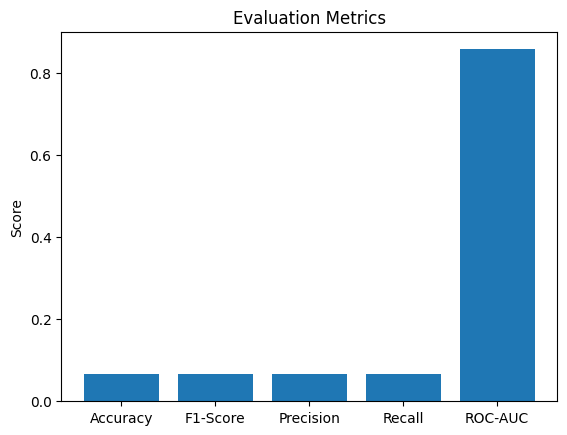

In [ ]:
# Plot the metrics
metrics = ['Accuracy', 'F1-Score', 'Precision', 'Recall', 'ROC-AUC']
values = [accuracy, f1, precision, recall, roc_auc]

plt.bar(metrics, values)
plt.ylabel('Score')
plt.title('Evaluation Metrics')
plt.show()

NEW CNN MODEL WITH PRE TRAINED **MODEL**

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.applications import ResNet50  # Import ResNet model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

# READING DATASET

df = pd.read_csv('../content/drive/MyDrive/Movies-Poster_Dataset-master/train.csv')
# Taking 50 percentage of the dataset for this project as using the whole dataset crashes the memory threshold of kaggle kernels
df = df.head(5000)

# CONVERTING THE IMAGES INTO NUMPY TO TRAIN THE MODEL

width = 350
height = 350
X = []
for i in tqdm(range(df.shape[0])):
    path = '../content/drive/MyDrive/Movies-Poster_Dataset-master/Images/' + df['Id'][i] + '.jpg'
    img = image.load_img(path, target_size=(width, height, 3))
    img = image.img_to_array(img)
    img = img / 255.0
    X.append(img)

X = np.array(X)




100%|██████████| 5000/5000 [00:21<00:00, 229.65it/s]


In [ ]:
X.shape

(5000, 350, 350, 3)

In [ ]:
y = df.drop(['Id', 'Genre'], axis=1)
y = y.to_numpy()
y.shape

(5000, 25)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
# Create a ResNet50 model with pre-trained weights and exclude the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(350, 350, 3))

model = Sequential()
model.add(base_model)  # Add ResNet model
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 11, 11, 2048)      23587712  
                                                                 
 flatten (Flatten)           (None, 247808)            0         
                                                                 
 dense (Dense)               (None, 128)               31719552  
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 25)                3225      
                                                        

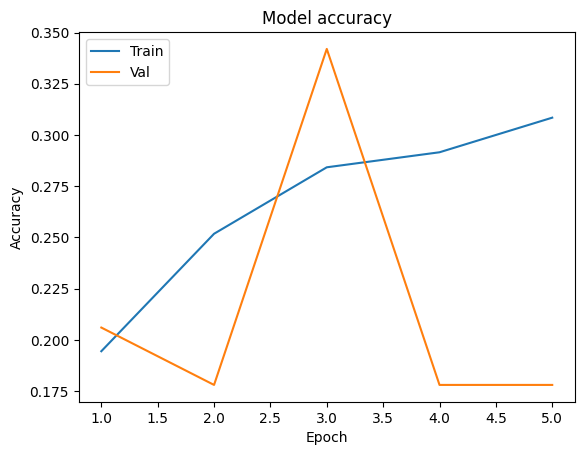

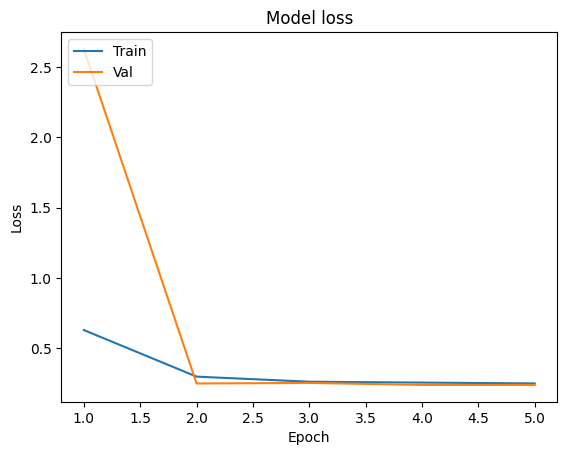

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(history, 5)





In [ ]:
# PREDICTING GENRE AND COMPUTING METRICS
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred > 0.5, average='micro')
    recall = recall_score(y_test, y_pred > 0.5, average='micro')
    f1 = f1_score(y_test, y_pred > 0.5, average='micro')
    accuracy = accuracy_score(y_test, y_pred > 0.5)

    # Calculate ROC AUC for each class separately
    roc_auc = roc_auc_score(y_test, y_pred, average='micro')

    return precision, recall, f1, accuracy, roc_auc


precision, recall, f1, accuracy, roc_auc = evaluate_model(model, X_test, y_test)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")

16/16 [==============================] - 83s 5s/step
Precision: 0.504
Recall: 0.21158690176322417
F1-Score: 0.29804849201655825
Accuracy: 0.062
ROC AUC: 0.8429220420581482


16/16 [==============================] - 58s 4s/step


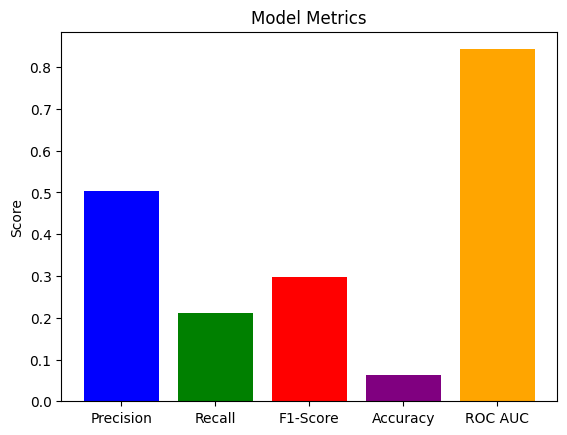

In [ ]:
precision, recall, f1, accuracy, roc_auc = evaluate_model(model, X_test, y_test)

# Bar chart for metrics
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'ROC AUC']
values = [precision, recall, f1, accuracy, roc_auc]

plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Model Metrics')
plt.ylabel('Score')
plt.show()

1/1 [==============================] - 0s 198ms/step
Drama
Comedy
Action


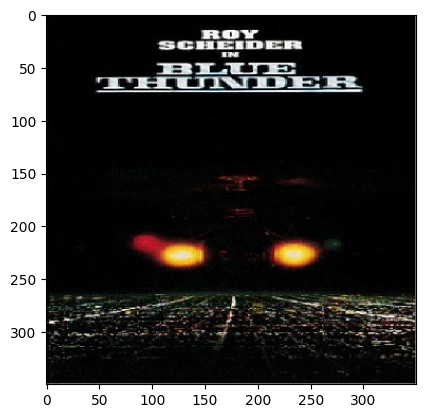

In [ ]:
img = image.load_img('../content/drive/MyDrive/Movies-Poster_Dataset-master/Images/tt0085255.jpg',target_size=(width,height,3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1,width,height,3)
classes = df.columns[2:]
y_pred = model.predict(img)
top3=np.argsort(y_pred[0])[:-4:-1]
for i in range(3):
  print(classes[top3[i]])